# Docling Information Extraction Tutorial

This notebook demonstrates **Docling's structured information extraction** from unstructured documents using templates and Pydantic models.

## Learning Path

```mermaid
%%{init: {'theme':'base', 'themeVariables': { 'primaryColor':'#e3f2fd','primaryTextColor':'#0d47a1','primaryBorderColor':'#1976d2','lineColor':'#42a5f5','secondaryColor':'#fff3e0','tertiaryColor':'#f3e5f5','edgeLabelBackground':'#ffffff'}}}%%
graph TB
    subgraph Setup["🔧 Setup (Blue)"]
        A[Document Extractor]
        B[Input Formats]
    end
    
    subgraph Templates["📋 Templates (Orange)"]
        C[String Template]
        D[Dict Template]
        E[Basic Pydantic Model]
    end
    
    subgraph Advanced["🚀 Advanced Pydantic (Purple)"]
        F[Nested Models]
        G[Default Values]
        H[Field Examples]
        I[Optional Fields]
    end
    
    subgraph Validation["✅ Validation (Green)"]
        J[Model Validation]
        K[Type Conversion]
        L[Structured Output]
    end
    
    subgraph UseCases["💼 Use Cases (Pink)"]
        M[Invoice Extraction]
        N[Contact Information]
        O[Multi-Page Documents]
        P[Real-world Workflows]
    end
    
    A --> B --> C
    C --> D --> E
    E --> F --> G
    G --> H --> I
    I --> J --> K
    K --> L --> M
    M --> N --> O --> P
    
    style Setup fill:#e3f2fd,stroke:#1976d2,stroke-width:3px
    style Templates fill:#fff3e0,stroke:#f57c00,stroke-width:3px
    style Advanced fill:#f3e5f5,stroke:#8e24aa,stroke-width:3px
    style Validation fill:#e8f5e9,stroke:#388e3c,stroke-width:3px
    style UseCases fill:#fce4ec,stroke:#c2185b,stroke-width:3px
```

**Topics Covered:**
1. DocumentExtractor Setup & Configuration
2. String & Dictionary Templates
3. Basic Pydantic Models with Fields
4. Advanced Nested Pydantic Models
5. Default Values, Examples & Optional Fields
6. Model Validation & Type Conversion
7. Real-world Invoice & Contact Extraction
8. Multi-Page Document Processing

> **⚠️ Note:** The extraction API is currently experimental and may change without prior notice. Only PDF and image formats are supported.

# 📦 Setup & Installation

In [ ]:
# # Install required packages
# import sys
# import subprocess

# packages = [
#     "docling[vlm]",  # Docling with VLM support for extraction
#     "pydantic",
#     "rich",
#     "reportlab",
#     "pillow"
# ]

# for package in packages:
#     try:
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
#         print(f"✓ {package} installed")
#     except subprocess.CalledProcessError:
#         print(f"✗ Failed to install {package}")

# 🗂️ Mock Data Generation

Generate sample invoices and documents for testing information extraction

In [1]:
# Generate mock invoice images and PDFs
import os
from pathlib import Path
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from PIL import Image, ImageDraw, ImageFont

# Create mock_data directory
mock_dir = Path("./mock_data_extraction")
mock_dir.mkdir(exist_ok=True)

# 1. Generate Invoice PDF
invoice_pdf_path = mock_dir / "sample_invoice.pdf"
c = canvas.Canvas(str(invoice_pdf_path), pagesize=letter)
width, height = letter

# Invoice Header
c.setFont("Helvetica-Bold", 24)
c.drawString(50, height - 50, "INVOICE")

# Invoice Details
c.setFont("Helvetica", 12)
invoice_details = [
    f"Invoice No: INV-2024-001",
    f"Date: January 13, 2026",
    f"",
    f"From:",
    f"TechCorp Solutions",
    f"123 Innovation Drive",
    f"San Francisco, CA 94105",
    f"Tax ID: 12-3456789",
    f"",
    f"To:",
    f"Global Enterprises Inc.",
    f"456 Business Plaza",
    f"New York, NY 10001",
    f"",
    f"Description:",
    f"Software Development Services - Q1 2026",
    f"Total Hours: 160",
    f"Rate: $150/hour",
    f"",
    f"Subtotal: $24,000.00",
    f"Tax (8.5%): $2,040.00",
    f"",
    f"TOTAL: $26,040.00",
]

y_pos = height - 100
for line in invoice_details:
    if line.startswith("TOTAL:"):
        c.setFont("Helvetica-Bold", 14)
    else:
        c.setFont("Helvetica", 12)
    c.drawString(50, y_pos, line)
    y_pos -= 20

c.save()
print(f"✓ Created Invoice PDF: {invoice_pdf_path}")

# 2. Generate Receipt Image
receipt_img_path = mock_dir / "sample_receipt.png"
img = Image.new('RGB', (800, 1000), color='white')
draw = ImageDraw.Draw(img)

# Try to use default font
try:
    font = ImageFont.truetype("arial.ttf", 18)
    title_font = ImageFont.truetype("arial.ttf", 28)
    bold_font = ImageFont.truetype("arialbd.ttf", 22)
except:
    font = ImageFont.load_default()
    title_font = ImageFont.load_default()
    bold_font = ImageFont.load_default()

# Receipt content
draw.text((250, 30), "RETAIL STORE", fill='black', font=title_font)
draw.text((200, 70), "123 Shopping Ave, Suite 100", fill='black', font=font)
draw.text((250, 100), "City, State 12345", fill='black', font=font)
draw.line([(50, 130), (750, 130)], fill='black', width=2)

y = 160
draw.text((50, y), "Receipt #: RCP-5678", fill='black', font=font)
y += 30
draw.text((50, y), "Date: 2026-01-13", fill='black', font=font)
y += 30
draw.text((50, y), "Cashier: Jane Smith", fill='black', font=font)
y += 50

draw.line([(50, y), (750, y)], fill='black', width=2)
y += 30

# Items
items = [
    ("Product A", "2", "$15.99", "$31.98"),
    ("Product B", "1", "$25.50", "$25.50"),
    ("Product C", "3", "$8.99", "$26.97"),
]

draw.text((50, y), "Item", fill='black', font=bold_font)
draw.text((400, y), "Qty", fill='black', font=bold_font)
draw.text((500, y), "Price", fill='black', font=bold_font)
draw.text((650, y), "Total", fill='black', font=bold_font)
y += 40

for item, qty, price, total in items:
    draw.text((50, y), item, fill='black', font=font)
    draw.text((400, y), qty, fill='black', font=font)
    draw.text((500, y), price, fill='black', font=font)
    draw.text((650, y), total, fill='black', font=font)
    y += 35

draw.line([(50, y), (750, y)], fill='black', width=2)
y += 30

# Totals
draw.text((400, y), "Subtotal:", fill='black', font=bold_font)
draw.text((650, y), "$84.45", fill='black', font=bold_font)
y += 35
draw.text((400, y), "Tax (7%):", fill='black', font=font)
draw.text((650, y), "$5.91", fill='black', font=font)
y += 35
draw.text((400, y), "TOTAL:", fill='black', font=bold_font)
draw.text((650, y), "$90.36", fill='black', font=bold_font)

y += 60
draw.line([(50, y), (750, y)], fill='black', width=2)
y += 30
draw.text((200, y), "Thank you for your business!", fill='black', font=font)

img.save(receipt_img_path)
print(f"✓ Created Receipt Image: {receipt_img_path}")

# 3. Generate Business Card Image
card_img_path = mock_dir / "business_card.png"
card = Image.new('RGB', (600, 350), color='lightblue')
draw_card = ImageDraw.Draw(card)

try:
    card_font = ImageFont.truetype("arial.ttf", 24)
    card_name_font = ImageFont.truetype("arialbd.ttf", 32)
except:
    card_font = ImageFont.load_default()
    card_name_font = ImageFont.load_default()

# Business card content
draw_card.text((50, 50), "John Anderson", fill='black', font=card_name_font)
draw_card.text((50, 100), "Senior Solutions Architect", fill='darkblue', font=card_font)
draw_card.text((50, 150), "TechVision Corp", fill='black', font=card_font)
draw_card.text((50, 190), "john.anderson@techvision.com", fill='black', font=card_font)
draw_card.text((50, 230), "+1 (555) 123-4567", fill='black', font=card_font)
draw_card.text((50, 270), "789 Innovation Blvd, Seattle, WA 98101", fill='black', font=card_font)

card.save(card_img_path)
print(f"✓ Created Business Card: {card_img_path}")

print(f"\n✅ Mock extraction data created in: {mock_dir.absolute()}")
print(f"Files: {list(mock_dir.glob('*'))}")

✓ Created Invoice PDF: mock_data_extraction\sample_invoice.pdf
✓ Created Receipt Image: mock_data_extraction\sample_receipt.png
✓ Created Business Card: mock_data_extraction\business_card.png

✅ Mock extraction data created in: c:\git-projects\personal\github.com\OPENSEARCH_INTERMEDIATE_TUTORIAL\7. BONUS_PROJECTS\chonkie_docling_langxtract\2.docling\mock_data_extraction
Files: [WindowsPath('mock_data_extraction/business_card.png'), WindowsPath('mock_data_extraction/sample_invoice.pdf'), WindowsPath('mock_data_extraction/sample_receipt.png')]


---
# 1. Defining the Document Extractor

## Concept Overview
The `DocumentExtractor` is the main entry point for structured information extraction. It supports PDF and image formats and uses VLM (Vision Language Models) to extract structured data based on user-defined templates.

In [1]:
from docling.datamodel.base_models import InputFormat
from docling.document_extractor import DocumentExtractor
from pydantic import BaseModel, Field
from typing import Optional
from rich import print as rprint

# Initialize the document extractor
extractor = DocumentExtractor(
    allowed_formats=[InputFormat.IMAGE, InputFormat.PDF]
)

print("✓ DocumentExtractor initialized")
print(f"✓ Supported formats: {[InputFormat.IMAGE, InputFormat.PDF]}")
print("\n⚠️ Note: The extraction API is experimental and may change")

✓ DocumentExtractor initialized
✓ Supported formats: [<InputFormat.IMAGE: 'image'>, <InputFormat.PDF: 'pdf'>]

⚠️ Note: The extraction API is experimental and may change


In [8]:
import fitz  # PyMuPDF
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
from typing import List, Tuple, Optional, Union, Dict
from docling.document_converter import DocumentConverter
from IPython.display import display

def find_text_bounding_boxes(
    doc_result,
    search_texts: List[str],
    page_filter: Optional[int] = None
) -> Dict[str, List[Dict]]:
    """
    Find bounding boxes for specific text strings in a converted document.
    
    Args:
        doc_result: DocumentConverter result object
        search_texts: List of text strings to find
        page_filter: Optional page number to limit search
    
    Returns:
        Dictionary mapping search text to list of matches with bbox and page info
        
    Example:
        >>> matches = find_text_bounding_boxes(result, ["INV-2024-001", "26040.00"])
        >>> print(matches["INV-2024-001"])
        [{'text': 'INV-2024-001', 'page': 1, 'bbox': {'l': 50, 't': 100, 'r': 200, 'b': 120}}]
    """
    doc = doc_result.document
    matches = {text: [] for text in search_texts}
    
    # Iterate through document items
    for item, _ in doc.iterate_items():
        if not hasattr(item, 'text') or not hasattr(item, 'prov'):
            continue
        
        # Check if any search text is in this item
        for search_text in search_texts:
            if search_text and str(search_text) in item.text:
                # Get provenance (location) information
                if item.prov:
                    for prov in item.prov:
                        # Filter by page if specified
                        if page_filter and prov.page_no != page_filter:
                            continue
                        
                        bbox = prov.bbox
                        matches[search_text].append({
                            'text': search_text,
                            'full_text': item.text,
                            'page': prov.page_no,
                            'bbox': {
                                'l': bbox.l,
                                't': bbox.t,
                                'r': bbox.r,
                                'b': bbox.b,
                                'coord_origin': bbox.coord_origin
                            }
                        })
    
    return matches

def draw_bounding_boxes_on_page(
    source_path: Union[str, Path],
    bboxes: List[Dict],
    labels: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    line_width: int = 3,
    zoom: float = 2.0,
    output_path: Optional[Union[str, Path]] = None,
    show_inline: bool = True
) -> None:
    """
    Draw bounding boxes on PDF/image using PyMuPDF and matplotlib.
    
    Args:
        source_path: Path to PDF or image file
        bboxes: List of bbox dictionaries with 'l', 't', 'r', 'b', 'coord_origin', 'page'
        labels: Optional list of labels for each box
        colors: Optional list of colors for each box
        line_width: Width of bounding box lines
        zoom: Zoom factor for PDF rendering (higher = better quality)
        output_path: Optional path to save the annotated image
        show_inline: Whether to display the image inline
    
    Returns:
        None (displays matplotlib figure)
    """
    source_path = Path(source_path)
    
    # Default colors
    if colors is None:
        default_colors = [
            "red", "blue", "green", "orange", "purple",
            "cyan", "magenta", "yellow", "brown", "pink"
        ]
        colors = [default_colors[i % len(default_colors)] for i in range(len(bboxes))]
    
    # Group bboxes by page
    pages_bboxes = {}
    for i, bbox_info in enumerate(bboxes):
        bbox = bbox_info['bbox'] if 'bbox' in bbox_info else bbox_info
        page = bbox_info.get('page', 1)
        
        if page not in pages_bboxes:
            pages_bboxes[page] = []
        
        pages_bboxes[page].append({
            'bbox': bbox,
            'label': labels[i] if labels and i < len(labels) else None,
            'color': colors[i] if i < len(colors) else "red"
        })
    
    # Process each page
    for page_no, page_bboxes in pages_bboxes.items():
        # Load image based on file type
        if source_path.suffix.lower() == '.pdf':
            # Open PDF and render page
            pdf_doc = fitz.open(str(source_path))
            
            if page_no > len(pdf_doc):
                print(f"⚠️ Page {page_no} not found in PDF (total pages: {len(pdf_doc)})")
                pdf_doc.close()
                continue
            
            page = pdf_doc[page_no - 1]  # 0-indexed
            
            # Render page to image at higher resolution
            mat = fitz.Matrix(zoom, zoom)
            pix = page.get_pixmap(matrix=mat)
            img = Image.open(io.BytesIO(pix.tobytes("png")))
            
            pdf_doc.close()
        else:
            # Load image directly
            img = Image.open(source_path)
            # For images, adjust zoom based on image size
            zoom = 1.0
        
        # Create matplotlib figure
        fig, ax = plt.subplots(figsize=(12, 16))
        ax.imshow(img)
        
        # Draw each bounding box on this page
        for item in page_bboxes:
            bbox = item['bbox']
            label = item['label']
            color = item['color']
            
            # Handle coordinate system conversion
            coord_origin = bbox.get('coord_origin', 'BOTTOMLEFT')
            
            if coord_origin == 'BOTTOMLEFT':
                # Convert from BOTTOMLEFT to TOPLEFT
                # For PyMuPDF, the image is already in TOPLEFT, so we need to adjust
                img_height = img.height / zoom  # Original PDF height
                x = bbox['l']
                y = img_height - bbox['t']
                width = bbox['r'] - bbox['l']
                height = bbox['t'] - bbox['b']  # Note: inverted for BOTTOMLEFT
            else:
                # Already in TOPLEFT
                x = bbox['l']
                y = bbox['t']
                width = bbox['r'] - bbox['l']
                height = bbox['b'] - bbox['t']
            
            # Scale by zoom factor
            x_scaled = x * zoom
            y_scaled = y * zoom
            width_scaled = width * zoom
            height_scaled = height * zoom
            
            # Draw rectangle
            rect = patches.Rectangle(
                (x_scaled, y_scaled),
                width_scaled,
                height_scaled,
                linewidth=line_width,
                edgecolor=color,
                facecolor='none',
                linestyle='--'
            )
            ax.add_patch(rect)
            
            # Add label if provided
            if label:
                ax.text(
                    x_scaled,
                    max(0, y_scaled - 10),
                    label,
                    color=color,
                    fontsize=10,
                    fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8)
                )
        
        ax.axis('off')
        title = f"Page {page_no} - Extracted Fields Visualization"
        ax.set_title(title, fontsize=14, fontweight='bold')
        plt.tight_layout()
        
        # Save if output path provided
        if output_path:
            save_path = output_path
            if len(pages_bboxes) > 1:
                # Multiple pages - add page number to filename
                save_path = Path(str(output_path).replace('.png', f'_page{page_no}.png'))
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            print(f"✓ Saved annotated image to: {save_path}")
        
        # Display inline if requested
        if show_inline:
            plt.show()
        else:
            plt.close()
        
        print()

print("✅ Bounding box utilities loaded (PyMuPDF + Matplotlib)")
print("\n📦 Functions available:")
print("  • find_text_bounding_boxes() - Find bbox by matching text in document")
print("  • draw_bounding_boxes_on_page() - Visualize using PyMuPDF + matplotlib")

✅ Bounding box utilities loaded (PyMuPDF + Matplotlib)

📦 Functions available:
  • find_text_bounding_boxes() - Find bbox by matching text in document
  • draw_bounding_boxes_on_page() - Visualize using PyMuPDF + matplotlib


---
# 🎨 Bounding Box Extraction Strategy

## Concept Overview
While `DocumentExtractor.extract()` doesn't provide bounding boxes, we can get them by:
1. **Extract data** using `DocumentExtractor` (information extraction)
2. **Convert document** using `DocumentConverter` (layout analysis)
3. **Match extracted text** back to document structure to find bounding boxes

This hybrid approach gives us both structured extraction AND visual coordinates!

---
# 2. String Template Extraction

## Concept Overview
String templates define the extraction schema as a JSON string. This is the simplest approach for quick extraction tasks. The format is `{"field_name": "type"}` where type can be `string`, `float`, `int`, etc.

In [4]:
# Extract using string template
file_path = "./mock_data_extraction/sample_invoice.pdf"

result = extractor.extract(
    source=file_path,
    template='{"invoice_no": "string", "total": "float", "tax_id": "string"}',
)

print("📋 String Template Extraction Results:\n")
rprint(result.pages)

# Access extracted data
if result.pages:
    extracted = result.pages[0].extracted_data
    print(f"\n✓ Extracted Invoice No: {extracted.get('invoice_no', 'N/A')}")
    print(f"✓ Extracted Total: ${extracted.get('total', 0):.2f}")
    print(f"✓ Extracted Tax ID: {extracted.get('tax_id', 'N/A')}")

c:\git-projects\personal\github.com\OPENSEARCH_INTERMEDIATE_TUTORIAL\7. BONUS_PROJECTS\chonkie_docling_langxtract\.venv\Lib\site-packages\docling\document_extractor.py:145: UserWarning: The extract API is currently experimental and may change without prior notice.
Only PDF and image formats are supported.
  return next(all_res)
2026-01-14 20:36:07,036 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-14 20:36:07,036 - INFO - Going to extract document batch...
2026-01-14 20:36:07,036 - INFO - Initializing extraction pipeline for ExtractionVlmPipeline with options hash 7c9d02d4ada84f710cf551b9c92f2b85
2026-01-14 20:36:07,060 - INFO - Accelerator device: 'cuda:0'
2026-01-14 20:36:11,404 - INFO - Processing pages 1-9223372036854775807 of 1 total pages for extraction
The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
2026-01-14 20:36:14,886 - INFO - Finished extracting document s

📋 String Template Extraction Results:



[
    ExtractedPageData(
        page_no=1,
        extracted_data={'invoice_no': 'INV-2024-001', 'total': 26040.0, 'tax_id': '12-3456789'},
        raw_text='{"invoice_no": "INV-2024-001", "total": 26040.0, "tax_id": "12-3456789"}',
        errors=[]
    )
]


✓ Extracted Invoice No: INV-2024-001
✓ Extracted Total: $26040.00
✓ Extracted Tax ID: 12-3456789


2026-01-14 20:39:57,423 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-14 20:39:57,425 - INFO - Going to convert document batch...
2026-01-14 20:39:57,425 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e15bc6f248154cc62f8db15ef18a8ab7
2026-01-14 20:39:57,425 - INFO - Accelerator device: 'cuda:0'
[INFO] 2026-01-14 20:39:57,436 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2026-01-14 20:39:57,441 [RapidOCR] download_file.py:60: File exists and is valid: C:\git-projects\personal\github.com\OPENSEARCH_INTERMEDIATE_TUTORIAL\7. BONUS_PROJECTS\chonkie_docling_langxtract\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.onnx
[INFO] 2026-01-14 20:39:57,442 [RapidOCR] main.py:53: Using C:\git-projects\personal\github.com\OPENSEARCH_INTERMEDIATE_TUTORIAL\7. BONUS_PROJECTS\chonkie_docling_langxtract\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.onnx
[INFO] 2026-01-14 20:39:57,506 [RapidOCR] base.py:22: Using engine

🔍 Extracted Data from DocumentExtractor:
  • invoice_no: INV-2024-001
  • total: 26040.0
  • tax_id: 12-3456789

📄 Converting document with DocumentConverter to get bounding boxes...


2026-01-14 20:39:57,656 - INFO - Accelerator device: 'cuda:0'
2026-01-14 20:39:58,009 - INFO - Accelerator device: 'cuda:0'
2026-01-14 20:39:58,436 - INFO - Processing document sample_invoice.pdf
2026-01-14 20:39:58,692 - INFO - Finished converting document sample_invoice.pdf in 1.27 sec.



🎯 Finding bounding boxes for extracted values...

✓ Found 'INV-2024-001':
  Page 1: bbox {'l': 50.0, 't': 700.616, 'r': 284.0, 'b': 289.516, 'coord_origin': <CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>}

✓ Found '12-3456789':
  Page 1: bbox {'l': 50.0, 't': 700.616, 'r': 284.0, 'b': 289.516, 'coord_origin': <CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>}

🎨 Visualizing 2 extracted fields with bounding boxes:
✓ Saved annotated image to: mock_data_extraction\invoice_extraction_with_bbox.png


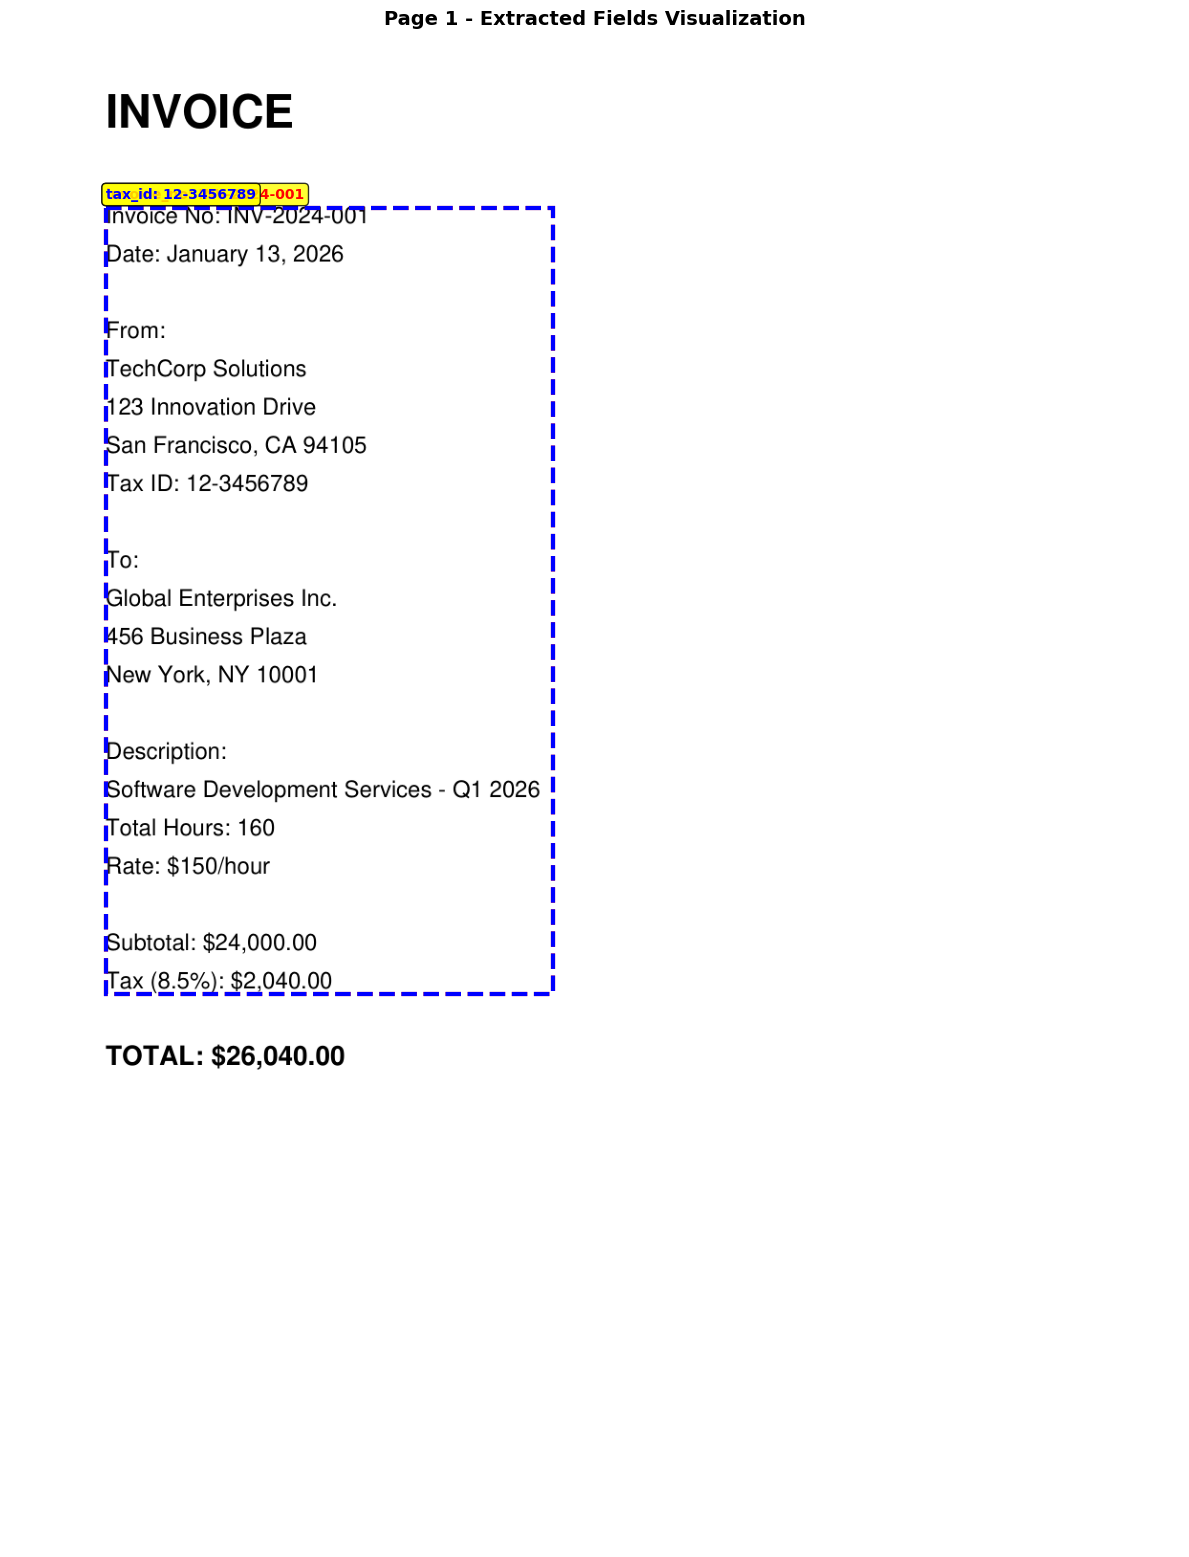

In [9]:
# Step 1: Get extracted data structure
if result.pages:
    page_data = result.pages[0]
    extracted = page_data.extracted_data
    
    print("🔍 Extracted Data from DocumentExtractor:")
    for field, value in extracted.items():
        print(f"  • {field}: {value}")

# Step 2: Convert document to get layout and bounding boxes
print("\n📄 Converting document with DocumentConverter to get bounding boxes...")
doc_converter = DocumentConverter()
conversion_result = doc_converter.convert(file_path)

# Step 3: Find bounding boxes for extracted values
print("\n🎯 Finding bounding boxes for extracted values...")
search_values = [str(v) for v in extracted.values() if v]
bbox_matches = find_text_bounding_boxes(conversion_result, search_values, page_filter=1)

# Display matches
for text, matches in bbox_matches.items():
    if matches:
        print(f"\n✓ Found '{text}':")
        for match in matches:
            print(f"  Page {match['page']}: bbox {match['bbox']}")

# Step 4: Visualize with bounding boxes
if bbox_matches:
    # Collect all bboxes that were found
    all_bboxes = []
    all_labels = []
    
    for field, value in extracted.items():
        value_str = str(value)
        if value_str in bbox_matches and bbox_matches[value_str]:
            # Use first match
            match = bbox_matches[value_str][0]
            all_bboxes.append(match)
            all_labels.append(f"{field}: {value}")
    
    if all_bboxes:
        print(f"\n🎨 Visualizing {len(all_bboxes)} extracted fields with bounding boxes:")
        try:
            draw_bounding_boxes_on_page(
                file_path,
                all_bboxes,
                labels=all_labels,
                output_path=mock_dir / "invoice_extraction_with_bbox.png"
            )
        except Exception as e:
            print(f"⚠️ Visualization error: {e}")
            print("   (Continuing without visualization)")
else:
    print("\n⚠️ No bounding boxes found - text matching may need adjustment")

## 📊 Visualize Extraction with Bounding Boxes

Now let's use DocumentConverter to get the document structure and find bounding boxes for our extracted fields.

---
# 3. Dictionary Template Extraction

## Concept Overview
Dictionary templates provide the same functionality as string templates but with Python dictionary syntax. This is more Pythonic and easier to read/maintain than JSON strings.

In [10]:
# Extract using dict template
result = extractor.extract(
    source=file_path,
    template={
        "invoice_no": "string",
        "total": "float",
        "tax_id": "string",
        "date": "string",
    },
)

print("📋 Dictionary Template Extraction Results:\n")
rprint(result.pages)

# Access extracted data
if result.pages:
    extracted = result.pages[0].extracted_data
    print(f"\n✓ Invoice No: {extracted.get('invoice_no', 'N/A')}")
    print(f"✓ Total: ${extracted.get('total', 0):.2f}")
    print(f"✓ Tax ID: {extracted.get('tax_id', 'N/A')}")
    print(f"✓ Date: {extracted.get('date', 'N/A')}")

c:\git-projects\personal\github.com\OPENSEARCH_INTERMEDIATE_TUTORIAL\7. BONUS_PROJECTS\chonkie_docling_langxtract\.venv\Lib\site-packages\docling\document_extractor.py:145: UserWarning: The extract API is currently experimental and may change without prior notice.
Only PDF and image formats are supported.
  return next(all_res)
2026-01-14 20:40:12,958 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-14 20:40:12,968 - INFO - Going to extract document batch...
2026-01-14 20:40:12,969 - INFO - Processing pages 1-9223372036854775807 of 1 total pages for extraction
2026-01-14 20:40:16,740 - INFO - Finished extracting document sample_invoice.pdf in 3.78 sec.


📋 Dictionary Template Extraction Results:



[
    ExtractedPageData(
        page_no=1,
        extracted_data={
            'invoice_no': 'INV-2024-001',
            'total': 26040.0,
            'tax_id': '12-3456789',
            'date': '2026-01-13'
        },
        raw_text='{"invoice_no": "INV-2024-001", "total": 26040.0, "tax_id": "12-3456789", "date": "2026-01-13"}',
        errors=[]
    )
]


✓ Invoice No: INV-2024-001
✓ Total: $26040.00
✓ Tax ID: 12-3456789
✓ Date: 2026-01-13


🎯 Finding bounding boxes for dictionary template extracted values...
  ✓ Found 'INV-2024-001' in text: 'Invoice No: INV-2024-001 Date: January 13, 2026 Fr...'
  ⚠️ Could not find bbox for '26040.0' (field: total)
  ✓ Found '12-3456789' in text: 'Invoice No: INV-2024-001 Date: January 13, 2026 Fr...'
  ⚠️ Could not find bbox for '2026-01-13' (field: date)

🎨 Visualizing 2 fields from dictionary template:
✓ Saved annotated image to: mock_data_extraction\invoice_dict_template_with_bbox.png


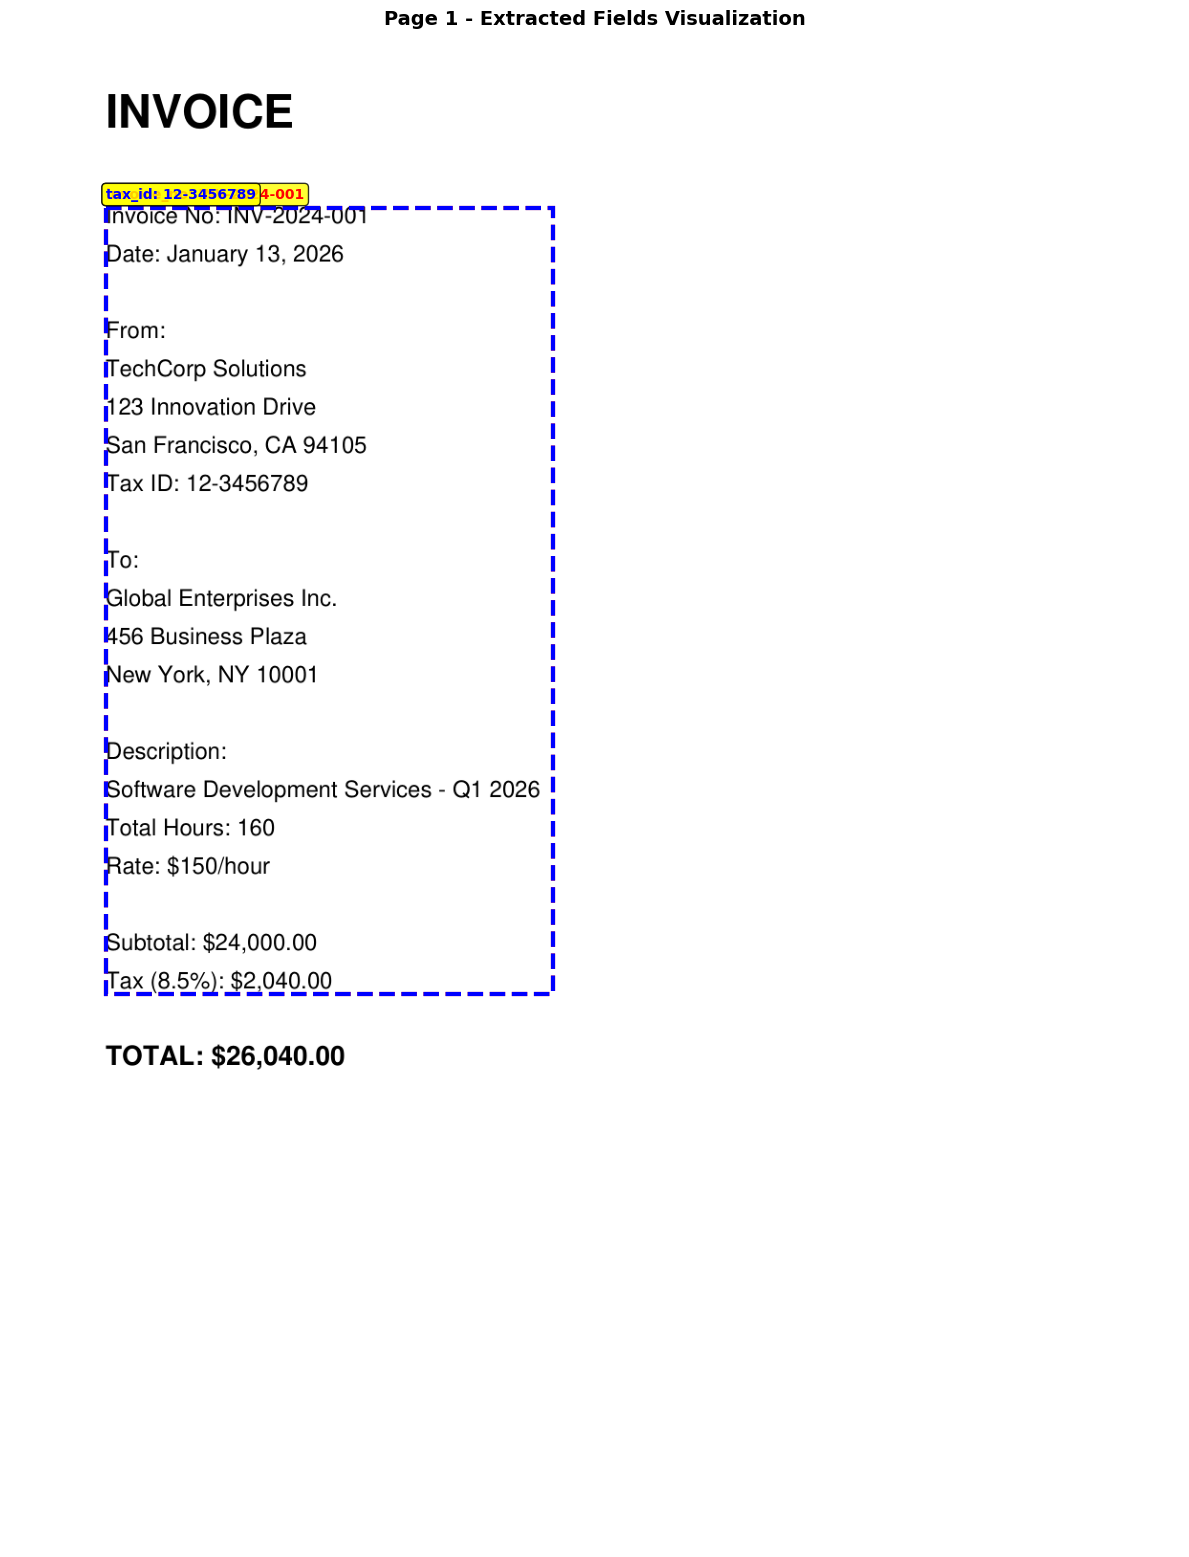

In [12]:
# Visualize dictionary template extraction results
if result.pages:
    dict_extracted = result.pages[0].extracted_data
    
    print("🎯 Finding bounding boxes for dictionary template extracted values...")
    
    # Find bounding boxes with improved precision
    dict_bboxes = []
    dict_labels = []
    
    for field, value in dict_extracted.items():
        if not value:
            continue
            
        value_str = str(value)
        
        # Search in document for this specific value
        # We'll look for the smallest text element that contains our value
        best_match = None
        min_length = float('inf')
        
        for item, _ in conversion_result.document.iterate_items():
            if not hasattr(item, 'text') or not hasattr(item, 'prov'):
                continue
            
            # Check if value is in this item's text
            if value_str in item.text:
                # Prefer shorter matches (more precise)
                if len(item.text) < min_length:
                    min_length = len(item.text)
                    
                    if item.prov:
                        for prov in item.prov:
                            if prov.page_no == 1:  # First page only
                                bbox = prov.bbox
                                best_match = {
                                    'text': value_str,
                                    'full_text': item.text,
                                    'page': prov.page_no,
                                    'bbox': {
                                        'l': bbox.l,
                                        't': bbox.t,
                                        'r': bbox.r,
                                        'b': bbox.b,
                                        'coord_origin': bbox.coord_origin
                                    }
                                }
        
        if best_match:
            dict_bboxes.append(best_match)
            dict_labels.append(f"{field}: {value}")
            print(f"  ✓ Found '{value}' in text: '{best_match['full_text'][:50]}...'")
        else:
            print(f"  ⚠️ Could not find bbox for '{value}' (field: {field})")
    
    if dict_bboxes:
        print(f"\n🎨 Visualizing {len(dict_bboxes)} fields from dictionary template:")
        try:
            draw_bounding_boxes_on_page(
                file_path,
                dict_bboxes,
                labels=dict_labels,
                output_path=mock_dir / "invoice_dict_template_with_bbox.png"
            )
        except Exception as e:
            print(f"⚠️ Visualization error: {e}")
    else:
        print("\n⚠️ No bounding boxes found for dictionary template values")

## 📊 Visualize Dictionary Template Results

Now let's visualize the extracted fields with bounding boxes using our hybrid approach.

---
# 4. Basic Pydantic Model Template

## Concept Overview
Pydantic models provide type safety, validation, and IDE support. They define structured schemas with default values, examples, and optional fields. This is the recommended approach for production use.

In [13]:
# Define a basic Pydantic model
class Invoice(BaseModel):
    invoice_no: str = Field(
        examples=["INV-123", "INV-456"]  # Provide examples, no default
    )
    total: float = Field(
        default=0.0,  # Provide default value
        examples=[100.0, 500.0]
    )
    tax_id: Optional[str] = Field(
        default=None,  # Optional field
        examples=["12-3456789"]
    )
    date: Optional[str] = Field(
        default=None,
        examples=["2024-01-01"]
    )

# Extract using Pydantic model
result = extractor.extract(
    source=file_path,
    template=Invoice,
)

print("📋 Pydantic Model Extraction Results:\n")
rprint(result.pages)

# Validate and load with Pydantic
if result.pages:
    invoice = Invoice.model_validate(result.pages[0].extracted_data)
    print(f"\n✅ Validated Invoice Object:")
    rprint(invoice)
    print(f"\n✓ Type-safe access: {invoice.invoice_no}")
    print(f"✓ Total: ${invoice.total:.2f}")

2026-01-14 20:45:03,736 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-14 20:45:03,738 - INFO - Going to extract document batch...
2026-01-14 20:45:03,738 - INFO - Processing pages 1-9223372036854775807 of 1 total pages for extraction
2026-01-14 20:45:07,827 - INFO - Finished extracting document sample_invoice.pdf in 4.09 sec.


📋 Pydantic Model Extraction Results:



[
    ExtractedPageData(
        page_no=1,
        extracted_data={
            'invoice_no': 'INV-2024-001',
            'total': 26040.0,
            'tax_id': '12-3456789',
            'date': '2026-01-13'
        },
        raw_text='{"invoice_no": "INV-2024-001", "total": 26040.0, "tax_id": "12-3456789", "date": "2026-01-13"}',
        errors=[]
    )
]


✅ Validated Invoice Object:


Invoice(invoice_no='INV-2024-001', total=26040.0, tax_id='12-3456789', date='2026-01-13')


✓ Type-safe access: INV-2024-001
✓ Total: $26040.00


---
# 5. Pydantic Model with Instance Defaults

## Concept Overview
You can pass a Pydantic model **instance** as a template, overriding default values. This is useful when you have contextual information (e.g., known invoice number) that should be used as fallback if extraction fails.

In [14]:
# Extract with custom instance defaults
result = extractor.extract(
    source=file_path,
    template=Invoice(
        invoice_no="UNKNOWN-001",  # Fallback if not extracted
        total=0.0,
        tax_id="00-0000000",  # Default tax ID
        date="2026-01-01",
    ),
)

print("📋 Extraction with Instance Defaults:\n")
rprint(result.pages)

if result.pages:
    invoice = Invoice.model_validate(result.pages[0].extracted_data)
    print(f"\n✓ Invoice No: {invoice.invoice_no} (extracted or default)")
    print(f"✓ Tax ID: {invoice.tax_id} (extracted or default)")
    print(f"✓ Total: ${invoice.total:.2f}")

c:\git-projects\personal\github.com\OPENSEARCH_INTERMEDIATE_TUTORIAL\7. BONUS_PROJECTS\chonkie_docling_langxtract\.venv\Lib\site-packages\docling\document_extractor.py:145: UserWarning: The extract API is currently experimental and may change without prior notice.
Only PDF and image formats are supported.
  return next(all_res)
2026-01-14 20:45:15,407 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2026-01-14 20:45:15,408 - INFO - Going to extract document batch...
2026-01-14 20:45:15,408 - INFO - Processing pages 1-9223372036854775807 of 1 total pages for extraction
2026-01-14 20:45:19,199 - INFO - Finished extracting document sample_invoice.pdf in 3.80 sec.


📋 Extraction with Instance Defaults:



[
    ExtractedPageData(
        page_no=1,
        extracted_data={
            'invoice_no': 'INV-2024-001',
            'total': 26040.0,
            'tax_id': '12-3456789',
            'date': '2026-01-13'
        },
        raw_text='{"invoice_no": "INV-2024-001", "total": 26040.0, "tax_id": "12-3456789", "date": "2026-01-13"}',
        errors=[]
    )
]


✓ Invoice No: INV-2024-001 (extracted or default)
✓ Tax ID: 12-3456789 (extracted or default)
✓ Total: $26040.00


---
# 6. Advanced Nested Pydantic Models

## Concept Overview
Nested Pydantic models capture hierarchical data structures. For example, an invoice with sender and receiver contact information. This enables extraction of complex, structured data with relationships.

In [ ]:
# Define nested models
class Contact(BaseModel):
    name: Optional[str] = Field(
        default=None,
        examples=["John Smith", "Jane Doe"]
    )
    address: str = Field(
        default="123 Main St",
        examples=["456 Elm St", "789 Oak Ave"]
    )
    postal_code: str = Field(
        default="12345",
        examples=["67890", "11111"]
    )
    city: str = Field(
        default="Anytown",
        examples=["Springfield", "Portland"]
    )
    country: Optional[str] = Field(
        default=None,
        examples=["USA", "Canada"]
    )

class ExtendedInvoice(BaseModel):
    invoice_no: str = Field(examples=["INV-123", "INV-456"])
    total: float = Field(default=0.0, examples=[100.0, 500.0])
    tax_amount: float = Field(default=0.0, examples=[10.0, 50.0])
    description: Optional[str] = Field(
        default=None,
        examples=["Software Development", "Consulting Services"]
    )
    sender: Contact = Field(
        default=Contact(),
        examples=[Contact()]
    )
    receiver: Contact = Field(
        default=Contact(),
        examples=[Contact()]
    )

# Extract with nested model
result = extractor.extract(
    source=file_path,
    template=ExtendedInvoice,
)

print("📋 Nested Pydantic Model Extraction Results:\n")
rprint(result.pages)

if result.pages:
    extended_invoice = ExtendedInvoice.model_validate(result.pages[0].extracted_data)
    print(f"\n✅ Validated Extended Invoice:")
    rprint(extended_invoice)

---
# 7. Validating and Using Extracted Data

## Concept Overview
Once extracted, Pydantic validates the data and provides a type-safe object. You can access fields with IDE autocomplete and use the data in workflows without manual parsing or type checking.

In [ ]:
# Extract and validate
result = extractor.extract(
    source=file_path,
    template=ExtendedInvoice,
)

if result.pages:
    # Validate with Pydantic
    invoice = ExtendedInvoice.model_validate(result.pages[0].extracted_data)
    
    print("✅ Data Validation & Usage:\n")
    
    # Type-safe access
    print(f"Invoice #{invoice.invoice_no}")
    print(f"Description: {invoice.description or 'N/A'}")
    print(f"Total: ${invoice.total:.2f}")
    print(f"Tax: ${invoice.tax_amount:.2f}")
    print()
    
    # Access nested data
    print(f"From: {invoice.sender.name or 'Unknown'}")
    print(f"      {invoice.sender.address}")
    print(f"      {invoice.sender.city}, {invoice.sender.postal_code}")
    print()
    
    print(f"To: {invoice.receiver.name or 'Unknown'}")
    print(f"    {invoice.receiver.address}")
    print(f"    {invoice.receiver.city}, {invoice.receiver.postal_code}")
    print()
    
    # Use in business logic
    formatted_message = (
        f"Invoice #{invoice.invoice_no} was sent by {invoice.sender.name or 'Unknown'} "
        f"to {invoice.receiver.name or 'Unknown'} at {invoice.receiver.address}. "
        f"Total amount: ${invoice.total:.2f}"
    )
    print(f"📧 Business Logic Output:\n{formatted_message}")

---
# 8. Extracting from Receipt Images

## Concept Overview
Document extraction works equally well with images. Here we extract receipt data including items, quantities, and totals from a receipt image using a custom Pydantic model.

In [ ]:
# Define receipt model
class Receipt(BaseModel):
    receipt_no: str = Field(examples=["RCP-123", "RCP-456"])
    date: str = Field(examples=["2024-01-01"])
    cashier: Optional[str] = Field(default=None, examples=["John Doe"])
    subtotal: float = Field(default=0.0, examples=[50.0, 100.0])
    tax: float = Field(default=0.0, examples=[5.0, 10.0])
    total: float = Field(default=0.0, examples=[55.0, 110.0])

# Extract from receipt image
receipt_path = "./mock_data_extraction/sample_receipt.png"
result = extractor.extract(
    source=receipt_path,
    template=Receipt,
)

print("📋 Receipt Image Extraction Results:\n")
rprint(result.pages)

if result.pages:
    receipt = Receipt.model_validate(result.pages[0].extracted_data)
    print(f"\n✅ Validated Receipt:")
    print(f"Receipt #{receipt.receipt_no}")
    print(f"Date: {receipt.date}")
    print(f"Cashier: {receipt.cashier or 'N/A'}")
    print(f"Subtotal: ${receipt.subtotal:.2f}")
    print(f"Tax: ${receipt.tax:.2f}")
    print(f"Total: ${receipt.total:.2f}")

In [ ]:
# Get bounding boxes for receipt fields
if result.pages:
    receipt_data = result.pages[0].extracted_data
    
    print("🎯 Finding bounding boxes for receipt fields...")
    
    # Convert receipt to get layout
    receipt_conversion = doc_converter.convert(receipt_path)
    
    # Search for extracted values
    receipt_values = [str(v) for v in receipt_data.values() if v]
    receipt_bbox_matches = find_text_bounding_boxes(receipt_conversion, receipt_values, page_filter=1)
    
    # Collect bboxes
    receipt_bboxes = []
    receipt_labels = []
    
    for field, value in receipt_data.items():
        value_str = str(value)
        if value_str in receipt_bbox_matches and receipt_bbox_matches[value_str]:
            match = receipt_bbox_matches[value_str][0]
            receipt_bboxes.append(match)
            receipt_labels.append(f"{field}: {value}")
    
    if receipt_bboxes:
        print(f"\n🎨 Visualizing {len(receipt_bboxes)} receipt fields:")
        try:
            draw_bounding_boxes_on_page(
                receipt_path,
                receipt_bboxes,
                labels=receipt_labels,
                output_path=mock_dir / "receipt_extraction_with_bbox.png"
            )
        except Exception as e:
            print(f"⚠️ Visualization error: {e}")

## 📊 Visualize Receipt Extraction with Bounding Boxes

Extract receipt data and visualize the locations on the image.

---
# 9. Extracting Contact Information from Business Cards

## Concept Overview
Information extraction can parse business cards, extracting names, titles, companies, emails, phones, and addresses. This demonstrates extraction from visually-oriented documents.

In [ ]:
# Define business card model
class BusinessCard(BaseModel):
    name: str = Field(examples=["John Smith", "Jane Anderson"])
    title: Optional[str] = Field(
        default=None,
        examples=["Software Engineer", "Senior Manager"]
    )
    company: Optional[str] = Field(
        default=None,
        examples=["TechCorp", "InnovateLabs"]
    )
    email: Optional[str] = Field(
        default=None,
        examples=["john@example.com", "jane@company.com"]
    )
    phone: Optional[str] = Field(
        default=None,
        examples=["+1-555-123-4567", "(555) 987-6543"]
    )
    address: Optional[str] = Field(
        default=None,
        examples=["123 Main St, City, State 12345"]
    )

# Extract from business card
card_path = "./mock_data_extraction/business_card.png"
result = extractor.extract(
    source=card_path,
    template=BusinessCard,
)

print("📋 Business Card Extraction Results:\n")
rprint(result.pages)

if result.pages:
    card = BusinessCard.model_validate(result.pages[0].extracted_data)
    print(f"\n✅ Validated Business Card:")
    print(f"Name: {card.name}")
    print(f"Title: {card.title or 'N/A'}")
    print(f"Company: {card.company or 'N/A'}")
    print(f"Email: {card.email or 'N/A'}")
    print(f"Phone: {card.phone or 'N/A'}")
    print(f"Address: {card.address or 'N/A'}")
    
    # Format for CRM import
    crm_entry = {
        "full_name": card.name,
        "job_title": card.title,
        "organization": card.company,
        "email_primary": card.email,
        "phone_mobile": card.phone,
        "address_full": card.address,
    }
    print(f"\n📊 CRM Format:")
    rprint(crm_entry)

In [ ]:
# Get bounding boxes for business card fields
if result.pages:
    card_data = result.pages[0].extracted_data
    
    print("🎯 Finding bounding boxes for business card fields...")
    
    # Convert card to get layout
    card_conversion = doc_converter.convert(card_path)
    
    # Search for extracted values
    card_values = [str(v) for v in card_data.values() if v]
    card_bbox_matches = find_text_bounding_boxes(card_conversion, card_values, page_filter=1)
    
    # Collect bboxes
    card_bboxes = []
    card_labels = []
    
    for field, value in card_data.items():
        value_str = str(value)
        if value_str in card_bbox_matches and card_bbox_matches[value_str]:
            match = card_bbox_matches[value_str][0]
            card_bboxes.append(match)
            # Truncate long values
            display_value = value if len(str(value)) < 30 else str(value)[:27] + "..."
            card_labels.append(f"{field}: {display_value}")
    
    if card_bboxes:
        print(f"\n🎨 Visualizing {len(card_bboxes)} business card fields:")
        try:
            draw_bounding_boxes_on_page(
                card_path,
                card_bboxes,
                labels=card_labels,
                output_path=mock_dir / "business_card_extraction_with_bbox.png"
            )
        except Exception as e:
            print(f"⚠️ Visualization error: {e}")

## 📊 Visualize Business Card Extraction

Extract contact information and highlight the locations on the business card.

---
# 10. Multi-Page Document Extraction

## Concept Overview
The extractor returns results organized by page. Each page can have different extracted data, allowing processing of multi-page documents like contracts, reports, or multi-page invoices.

In [ ]:
# Demonstrate multi-page processing
print("📄 Multi-Page Document Handling:\n")

# The result.pages list contains ExtractedPageData for each page
if result.pages:
    print(f"Total pages processed: {len(result.pages)}")
    
    for page_data in result.pages:
        print(f"\n--- Page {page_data.page_no} ---")
        print(f"Extracted data: {page_data.extracted_data}")
        print(f"Raw text: {page_data.raw_text[:100]}..." if page_data.raw_text else "No raw text")
        print(f"Errors: {page_data.errors if page_data.errors else 'None'}")

# Example: Processing multi-page invoice
print("\n✓ For multi-page documents:")
print("  • Loop through result.pages")
print("  • Access page_data.page_no for page number")
print("  • Access page_data.extracted_data for structured data")
print("  • Check page_data.errors for extraction issues")

---
# 11. Error Handling and Edge Cases

## Concept Overview
Extraction may fail or return partial data. The `errors` field in `ExtractedPageData` contains any issues encountered. Always check for errors and handle missing data gracefully.

In [ ]:
# Demonstrate error handling
print("⚠️ Error Handling Best Practices:\n")

# Example with potential missing fields
result = extractor.extract(
    source=file_path,
    template=ExtendedInvoice,
)

if result.pages:
    for page_data in result.pages:
        # Check for errors
        if page_data.errors:
            print(f"❌ Errors on page {page_data.page_no}:")
            for error in page_data.errors:
                print(f"   - {error}")
        else:
            print(f"✅ Page {page_data.page_no}: No errors")
        
        # Safe access with get()
        data = page_data.extracted_data
        invoice_no = data.get('invoice_no', 'UNKNOWN')
        total = data.get('total', 0.0)
        
        print(f"   Invoice: {invoice_no}, Total: ${total:.2f}")
        
        # Validate with Pydantic (handles missing fields)
        try:
            invoice = ExtendedInvoice.model_validate(data)
            print(f"   ✓ Validation successful")
        except Exception as e:
            print(f"   ✗ Validation failed: {e}")

print("\n💡 Best Practices:")
print("  1. Always check result.pages is not empty")
print("  2. Check page_data.errors for extraction issues")
print("  3. Use Optional fields for data that may not exist")
print("  4. Use Field(default=...) for graceful fallbacks")
print("  5. Wrap model_validate() in try-except")

---
# 12. Complete Extraction Workflow

## Concept Overview
End-to-end workflow: define schema → extract → validate → use in business logic. This demonstrates a production-ready pipeline for document processing automation.

In [ ]:
# Complete workflow demonstration
print("🔄 Complete Information Extraction Workflow\n")
print("=" * 80)

# Step 1: Define schema
print("\n1️⃣ Define Pydantic Schema")
class InvoiceWorkflow(BaseModel):
    invoice_no: str = Field(examples=["INV-123"])
    total: float = Field(default=0.0)
    tax_id: Optional[str] = Field(default=None)
    sender: Contact = Field(default=Contact())
    receiver: Contact = Field(default=Contact())
print("   ✓ Schema defined with nested models")

# Step 2: Extract
print("\n2️⃣ Extract from Document")
file_path = "./mock_data_extraction/sample_invoice.pdf"
result = extractor.extract(source=file_path, template=InvoiceWorkflow)
print(f"   ✓ Extracted {len(result.pages)} page(s)")

# Step 3: Validate
print("\n3️⃣ Validate Extracted Data")
if result.pages:
    page_data = result.pages[0]
    if page_data.errors:
        print(f"   ⚠️ Found {len(page_data.errors)} error(s)")
    else:
        print(f"   ✓ No errors")
    
    try:
        invoice = InvoiceWorkflow.model_validate(page_data.extracted_data)
        print(f"   ✓ Pydantic validation passed")
    except Exception as e:
        print(f"   ✗ Validation failed: {e}")
        invoice = None

# Step 4: Business Logic
print("\n4️⃣ Apply Business Logic")
if invoice:
    # Example: Send email notification
    email_body = f"""
    New Invoice Received
    
    Invoice Number: {invoice.invoice_no}
    Total Amount: ${invoice.total:.2f}
    
    From: {invoice.sender.name or 'Unknown'}
          {invoice.sender.city}, {invoice.sender.country or 'N/A'}
    
    To: {invoice.receiver.name or 'Unknown'}
        {invoice.receiver.city}, {invoice.receiver.country or 'N/A'}
    
    Action Required: Review and approve
    """
    print(email_body)
    
    # Example: Database record
    db_record = {
        "invoice_id": invoice.invoice_no,
        "amount": invoice.total,
        "sender_name": invoice.sender.name,
        "receiver_name": invoice.receiver.name,
        "status": "pending_approval",
    }
    print(f"💾 Database Record:")
    rprint(db_record)

print("\n" + "=" * 80)
print("✅ Complete workflow executed successfully!")

---
# 13. Batch Processing Multiple Documents

## Concept Overview
Process multiple documents in a loop, collecting results for batch processing. This is useful for automation pipelines handling folders of invoices, receipts, or forms.

In [ ]:
# Batch processing example
print("📚 Batch Document Processing\n")

# Define simple extraction model
class SimpleInvoice(BaseModel):
    invoice_no: str = Field(examples=["INV-123"])
    total: float = Field(default=0.0)
    date: Optional[str] = Field(default=None)

# List of documents to process
documents = [
    "./mock_data_extraction/sample_invoice.pdf",
    "./mock_data_extraction/sample_receipt.png",
]

# Process batch
results = []
for i, doc_path in enumerate(documents, 1):
    print(f"Processing document {i}/{len(documents)}: {Path(doc_path).name}")
    
    try:
        result = extractor.extract(source=doc_path, template=SimpleInvoice)
        
        if result.pages:
            data = result.pages[0].extracted_data
            invoice = SimpleInvoice.model_validate(data)
            results.append({
                "file": Path(doc_path).name,
                "invoice_no": invoice.invoice_no,
                "total": invoice.total,
                "status": "success"
            })
            print(f"  ✓ Extracted: {invoice.invoice_no}, Total: ${invoice.total:.2f}")
        else:
            results.append({
                "file": Path(doc_path).name,
                "status": "no_pages"
            })
            print(f"  ⚠️ No pages extracted")
    
    except Exception as e:
        results.append({
            "file": Path(doc_path).name,
            "status": "error",
            "error": str(e)
        })
        print(f"  ✗ Error: {e}")

# Summary
print(f"\n📊 Batch Processing Summary:")
print(f"Total documents: {len(documents)}")
print(f"Successful: {sum(1 for r in results if r.get('status') == 'success')}")
print(f"Failed: {sum(1 for r in results if r.get('status') != 'success')}")

print(f"\n📋 Results:")
rprint(results)

---
# 14. Advanced Field Configuration

## Concept Overview
Pydantic Field configurations control extraction behavior. Use `examples` to guide the model, `default` for missing data, `description` for documentation, and validation constraints.

In [ ]:
from pydantic import field_validator, Field
from typing import List

# Advanced field configuration
class AdvancedInvoice(BaseModel):
    invoice_no: str = Field(
        description="Unique invoice identifier",
        examples=["INV-2024-001", "BILL-123"],
        pattern=r"^[A-Z]{3}-\d{4}-\d{3}$"  # Validation pattern
    )
    
    total: float = Field(
        description="Total amount in USD",
        default=0.0,
        ge=0.0,  # Greater than or equal to 0
        examples=[100.0, 1500.50]
    )
    
    date: str = Field(
        description="Invoice date in ISO format",
        examples=["2024-01-13", "2026-12-31"],
        pattern=r"^\d{4}-\d{2}-\d{2}$"
    )
    
    items: Optional[List[str]] = Field(
        default=None,
        description="List of line items",
        examples=[["Item 1", "Item 2"]]
    )
    
    # Custom validator
    @field_validator('total')
    @classmethod
    def validate_total(cls, v):
        if v < 0:
            raise ValueError('Total cannot be negative')
        if v > 1000000:
            raise ValueError('Total exceeds maximum allowed amount')
        return v

print("🔧 Advanced Field Configuration:\n")
print("✓ Pattern validation for invoice_no")
print("✓ Range validation for total (>= 0)")
print("✓ Date format validation")
print("✓ List fields for items")
print("✓ Custom validators for business rules")

# Example usage
print("\n📋 Schema:")
rprint(AdvancedInvoice.model_json_schema())

---
# 15. Real-world Use Cases

## Concept Overview
Information extraction enables automation of document-heavy workflows: invoice processing, receipt scanning, form data entry, contract parsing, and identity verification.

In [ ]:
print("💼 Real-world Use Cases for Information Extraction\n")
print("=" * 80)

use_cases = [
    {
        "title": "📄 Invoice Processing",
        "description": "Extract invoice data, validate against POs, route for approval",
        "fields": ["invoice_no", "vendor", "amount", "line_items", "due_date"],
        "automation": "Auto-match PO, send to approver, update accounting system"
    },
    {
        "title": "🧾 Receipt Scanning",
        "description": "Extract expense data from receipts for reimbursement",
        "fields": ["merchant", "date", "total", "tax", "category"],
        "automation": "Create expense report, attach to employee record, submit for approval"
    },
    {
        "title": "📋 Form Data Entry",
        "description": "Extract data from paper/PDF forms into database",
        "fields": ["applicant_name", "address", "ssn", "income", "employer"],
        "automation": "Populate CRM/ERP, trigger workflows, send confirmation"
    },
    {
        "title": "📜 Contract Parsing",
        "description": "Extract key terms from legal contracts",
        "fields": ["parties", "effective_date", "termination_date", "value", "clauses"],
        "automation": "Alert on renewals, track obligations, compliance monitoring"
    },
    {
        "title": "🪪 Identity Verification",
        "description": "Extract data from IDs, passports, driver's licenses",
        "fields": ["name", "dob", "id_number", "expiry_date", "address"],
        "automation": "KYC verification, fraud detection, account creation"
    },
    {
        "title": "📊 Financial Statements",
        "description": "Extract financial data from reports and statements",
        "fields": ["revenue", "expenses", "net_income", "assets", "liabilities"],
        "automation": "Financial analysis, reporting, compliance checks"
    },
]

for i, uc in enumerate(use_cases, 1):
    print(f"\n{i}. {uc['title']}")
    print(f"   {uc['description']}")
    print(f"   Fields: {', '.join(uc['fields'])}")
    print(f"   Automation: {uc['automation']}")

print("\n" + "=" * 80)
print("\n✅ Benefits:")
print("  • ⚡ 10-100x faster than manual data entry")
print("  • 🎯 95%+ accuracy with proper templates")
print("  • 💰 Significant cost savings on data entry labor")
print("  • 📈 Scalable to thousands of documents per day")
print("  • 🔄 Integrates with existing business systems")
print("  • 🤖 Enables end-to-end process automation")

---
# 🎯 Summary & Key Takeaways

## Core Concepts Covered
1. **DocumentExtractor** - Main API for information extraction from PDFs and images
2. **Template Types** - String, dict, and Pydantic model templates
3. **Pydantic Models** - Type-safe schemas with validation and defaults
4. **Nested Models** - Complex hierarchical data structures
5. **Field Configuration** - Examples, defaults, validation, and constraints

## Pydantic Best Practices
6. **Optional Fields** - Use `Optional[Type]` for fields that may not exist
7. **Default Values** - Provide `Field(default=...)` for graceful fallbacks
8. **Examples** - Guide extraction with `Field(examples=[...])`
9. **Validation** - Use `@field_validator` for custom business rules
10. **Instance Templates** - Override defaults with model instances

## Production Patterns
11. **Error Handling** - Check `errors` field and wrap validation in try-except
12. **Multi-Page Processing** - Loop through `result.pages` for each page
13. **Batch Processing** - Process folders of documents in loops
14. **Business Logic Integration** - Use validated models in workflows
15. **Real-world Applications** - Invoice processing, receipt scanning, form extraction

## 🎨 Bounding Box Strategy
**Hybrid Approach for Visual Feedback:**
1. **Extract** structured data with `DocumentExtractor.extract()`
2. **Convert** document with `DocumentConverter.convert()` for layout
3. **Match** extracted text values back to document structure
4. **Find** bounding boxes via provenance (`prov`) information
5. **Visualize** results by drawing boxes on document images

**Key Functions:**
- `find_text_bounding_boxes()` - Match text to get bbox coordinates
- `draw_bounding_boxes_on_page()` - Visualize on images/PDFs
- Handle coordinate systems (BOTTOMLEFT vs TOPLEFT)

## 🚀 Next Steps
- Define Pydantic models for your document types
- Test extraction accuracy with sample documents
- Build batch processing pipelines for automation
- Integrate with your business systems (ERP, CRM, etc.)
- Monitor extraction errors and refine templates
- Use hybrid approach for visual verification of extractions

## 💡 Pro Tips
- Use descriptive field names matching document terminology
- Provide multiple examples for better extraction accuracy
- Start with simple flat models, add nesting as needed
- Always validate extracted data with Pydantic
- Log errors for continuous improvement
- Combine extraction + conversion for complete solution
- Text matching works best with unique identifiers (invoice numbers, totals)

---

**Resources:**
- [Docling Extraction Docs](https://docling-project.github.io/docling/examples/extraction/)
- [Pydantic Documentation](https://docs.pydantic.dev/)
- [VLM Models for Extraction](https://docling-project.github.io/docling/usage/vision_models/)
- [DocumentConverter for Layout](https://docling-project.github.io/docling/examples/convert/)

---

⚠️ **Note:** The extraction API is experimental and may change. Only PDF and image formats are currently supported.